# pycaret으로 데이터 분석, 머신러닝 모델 만들기

pycaret은 **AutoML을 지원하는 파이썬 라이브러리**로,  
적은 코드로 머신러닝 워크 플로우를 자동화하는 오픈 소스 라이브러리.  
머신러닝 모델 개발시 많은 시간을 요구했던 **전처리과정, 모델 선택하기, 하이퍼파라미터 튜닝 작업**을  
자동화해주어 편리하고, 높은 생산성의 작업을 가능하게 한다.  

또한, scikit-learn 패키지를 기반으로 하고 있기 때문에  
Classification, Regression, Clustering, Anomaly Detection 등등  다양한 모델을 지원한다.  

[Pycaret 공식문서 사이트 들어가기](https://pycaret.gitbook.io/docs/)

# 1. pycaret Install

In [1]:
!pip install pycaret --quiet
!pip install shap --quiet

     |████████████████████████████████| 320 kB 20.5 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 10.4 MB 40.1 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 6.8 MB 43.8 MB/s 
     |████████████████████████████████| 268 kB 43.5 MB/s 
     |████████████████████████████████| 137 kB 43.2 MB/s 
     |████████████████████████████████| 167 kB 7.8 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 51.6 MB/s 
     |████████████████████████████████| 16.9 MB 43.9 MB/s 
     |████████████████████████████████| 1.7 MB 36.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 46.8 MB/s 
     |████████████████████████████████| 636 kB 53.0 MB/s 
     |████████████████

# 2. DataSet Load
## - get_data 함수 사용해서 juice 데이터 받아옴
## - 함수 실행 결과, 자동으로 head() 실행됨

In [2]:
!pip install squarify
import squarify
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

pd.set_option('display.max_columns', None) # 데이터프레임 컬럼 display

import warnings
warnings.filterwarnings('ignore') # 경고 무시

pd.options.display.float_format = '{:.4f}'.format # 데이터프레임 소수점 출력 포맷

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df_male = pd.read_csv('./male_volleyball.csv')
df_male

FileNotFoundError: ignored

In [ ]:
from pycaret.datasets import get_data 
dataset = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


모델의 특성에 맞는 모듈을 import 한다.  
우리는 분류 모델을 사용한다.   

setup()이라는 강력한 함수로 추후에 필요한 모든 환경, 컬럼값들을 다시 초기화  

In [ ]:
# 아래 셀의 setup() 실행시 오류발생하면 다음 코드를 실행하여 numba버전을 낮춰 설치하면 된다 
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 4.0 MB/s 
     |████████████████████████████████| 25.3 MB 4.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [ ]:
from pycaret.classification import *
setup_clf = setup(data=dataset, target='Purchase')

,Description,Value
0,session_id,7542
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


conpare_model() : 모델별 성능비교

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8290,0.8983,0.7492,0.8038,0.7723,0.6359,0.6404,0.017
lr,Logistic Regression,0.8250,0.8965,0.7354,0.8049,0.7646,0.6261,0.6317,0.453
ridge,Ridge Classifier,0.8249,0.0000,0.7491,0.7940,0.7682,0.6281,0.6315,0.014
ada,Ada Boost Classifier,0.8169,0.8817,0.7253,0.7936,0.7523,0.6084,0.6153,0.112
lightgbm,Light Gradient Boosting Machine,0.8116,0.8802,0.7321,0.7755,0.7482,0.5985,0.6041,0.127
gbc,Gradient Boosting Classifier,0.8089,0.8942,0.7287,0.7717,0.7453,0.5933,0.5983,0.132
rf,Random Forest Classifier,0.7902,0.8632,0.7079,0.7452,0.7210,0.5539,0.5594,0.511
qda,Quadratic Discriminant Analysis,0.7835,0.8467,0.8383,0.6809,0.7507,0.5632,0.5738,0.015
dt,Decision Tree Classifier,0.7768,0.7665,0.6943,0.7263,0.7046,0.5263,0.5316,0.016
nb,Naive Bayes,0.7715,0.8468,0.7801,0.6851,0.7272,0.5327,0.5388,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# 지원모델 목록 출력
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# 원하는 모델 생성
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.7834,0.6897,0.7407,0.7143,0.5444,0.5453
1,0.8133,0.7980,0.6897,0.8000,0.7407,0.5962,0.6002
2,0.7067,0.7035,0.6897,0.6061,0.6452,0.3969,0.3993
3,0.7600,0.7714,0.7241,0.6774,0.7000,0.5004,0.5011
4,0.7333,0.6829,0.5172,0.7143,0.6000,0.4076,0.4195
5,0.8133,0.8276,0.8966,0.7027,0.7879,0.6255,0.6404
6,0.7600,0.7275,0.5517,0.7619,0.6400,0.4668,0.4805
7,0.7867,0.7811,0.6667,0.7692,0.7143,0.5455,0.5490
8,0.7838,0.7732,0.7241,0.7241,0.7241,0.5464,0.5464


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7542, splitter='best')
INFO:logs:create_model() succesfully completed......................................


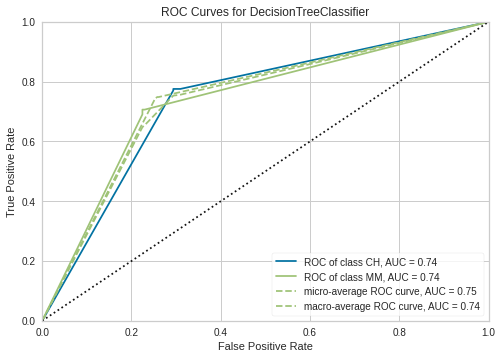

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# 훈련된 모델의 성능 출력
'''
'auc' - Area Under the Curve -> 기본값
'threshold' - Discrimination Threshold
'pr' - Precision Recall Curve
'confusion_matrix' - Confusion Matrix
'error' - Class Prediction Error
'class_report' - Classification Report
'boundary' - Decision Boundary
'rfe' - Recursive Feature Selection
'learning' - Learning Curve
'manifold' - Manifold Learning
'calibration' - Calibration Curve
'vc' - Validation Curve
'dimension' - Dimension Learning
'feature' - Feature Importance
'feature_all' - Feature Importance (All)
'parameter' - Model Hyperparameter
'lift' - Lift Curve
'gain' - Gain Chart
'tree' - Decision Tree
'ks' - KS Statistic Plot
'''
plot_model(dt)

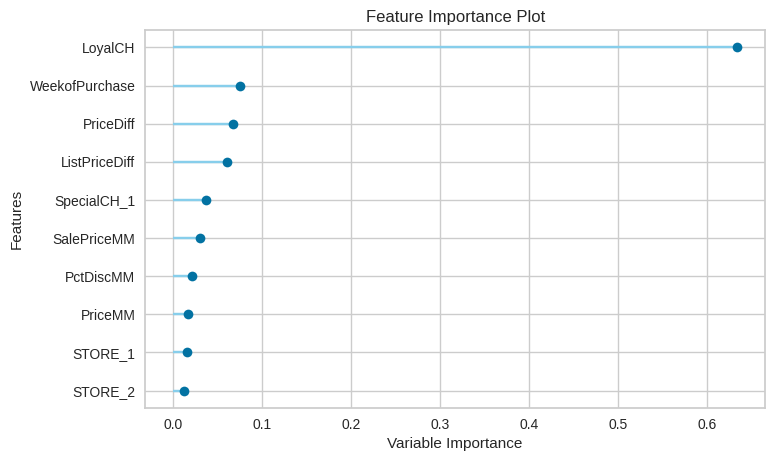

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt, plot="feature")

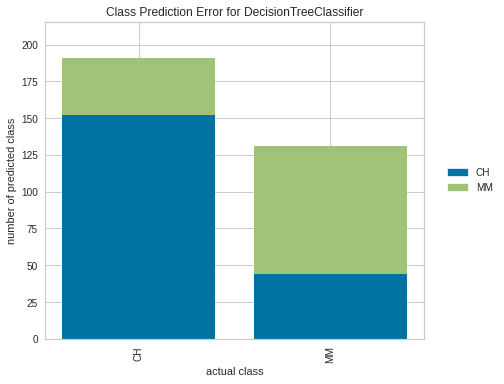

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(dt, plot="error")

In [ ]:
# 훈련된 모델의 모든 성능정보를 출력
evaluate_model(dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7542, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…